# Car price Prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

In [2]:
data=pd.read_csv('C:\\Users\\DELL\\Desktop\\Internship\\Car Price Prediction\\cardekho1.csv')
data.head()

,full_name,selling_price,new_price,year,seller_type,km_driven,owner_type,fuel_type,transmission_type,mileage,engine,max_power,seats
0,Maruti Alto Std,1.2 Lakh*,NaN,2012,Individual,"1,20,000 kms",First Owner,Petrol,Manual,Mileage19.7 kmpl,Engine796 CC,Max Power46.3 bhp,Seats5
1,Hyundai Grand i10 Asta,5.5 Lakh*,New Car (On-Road Price) : Rs.7.11-7.48 Lakh*,2016,Individual,"20,000 kms",First Owner,Petrol,Manual,Mileage18.9 kmpl,Engine1197 CC,Max Power82 bhp,Seats5
2,Hyundai i20 Asta,2.15 Lakh*,NaN,2010,Individual,"60,000 kms",First Owner,Petrol,Manual,Mileage17.0 kmpl,Engine1197 CC,Max Power80 bhp,Seats5
3,Maruti Alto K10 2010-2014 VXI,2.26 Lakh*,NaN,2012,Individual,"37,000 kms",First Owner,Petrol,Manual,Mileage20.92 kmpl,Engine998 CC,Max Power67.1 bhp,Seats5
4,Ford Ecosport 2015-2021 1.5 TDCi Titanium BSIV,5.7 Lakh*,New Car (On-Road Price) : Rs.10.14-13.79 Lakh*,2015,Dealer,"30,000 kms",First Owner,Diesel,Manual,Mileage22.77 kmpl,Engine1498 CC,Max Power98.59 bhp,Seats5


In [3]:
data.describe(include = 'all')

,full_name,selling_price,new_price,year,seller_type,km_driven,owner_type,fuel_type,transmission_type,mileage,engine,max_power,seats
count,19974,19974,9564,19974.000000,19974,19974,19974,19974,19974,19814,19864,19637,19887
unique,3321,1215,1744,NaN,3,4515,1,5,2,561,169,493,9
top,Maruti Swift Dzire VDI,4.5 Lakh*,New Car (On-Road Price) : Rs.12.68-16.80 Lakh*,NaN,Dealer,"50,000 kms",First Owner,Diesel,Manual,Mileage18.9 kmpl,Engine1197 CC,Max Power74 bhp,Seats5
freq,210,466,144,NaN,11970,750,19974,9815,16025,624,2662,867,16585
mean,NaN,NaN,NaN,2014.526134,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,3.248791,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,1991.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,2015.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Checking NaN values

def null_count():
    return pd.DataFrame({'features': data.columns,
                'dtypes': data.dtypes.values,
                'NaN count': data.isnull().sum().values,
                'NaN percentage': data.isnull().sum().values/data.shape[0]}).style.background_gradient(cmap='Blues',low=0.1,high=0.01)
null_count()

,features,dtypes,NaN count,NaN percentage
0,full_name,object,0,0.000000
1,selling_price,object,0,0.000000
2,new_price,object,10410,0.521178
3,year,int64,0,0.000000
4,seller_type,object,0,0.000000
5,km_driven,object,0,0.000000
6,owner_type,object,0,0.000000
7,fuel_type,object,0,0.000000
8,transmission_type,object,0,0.000000
9,mileage,object,160,0.008010


### Cleaning Data

## Cleaning the data
### selling price has different values such as "5.5 Lakh*", "2.3 Cr*" and "95,000*" which is of data type object, gettting only the numerical value and multipling by suffix value lakhs, cr... eg(5.5 Lakh*: 500000, 2.3Cr*: 23000000, 95,000*: 95000)

In [5]:
for i in range(data.shape[0]):
    try:
        price = float(data['selling_price'][i].split(' ')[0])
        digit = data['selling_price'][i].split(' ')[1]
        if digit == 'Lakh*':
            price = price * 100000
            data['selling_price'][i] = price
        elif digit == 'Cr*':
            price = price * 10000000
            data['selling_price'][i] = price
    except:
        price = data['selling_price'][i][:-1]
        price = price.replace(',', '')
        data['selling_price'][i] = float(price)

## Cleaning kilometer driven, Mileage, Engine, Maxpower and Seats columns
### km_driven, mileage, engine, max_power and seats have values like "120,000 kms", "Mileage19.7 kmpl", "Engine796CC", "Max Power46.3 bhp" and "seats5", getting only the numerical values from those strings. eg (km_driven: 120000, mileage: 19.7, engine:796, max_power: 46.3, seats: 5)

In [6]:
# kilometer driven
data['km_driven'] = data['km_driven'].str.split(' ', n=1, expand=True)[0]
data['km_driven'] = data['km_driven'].str.replace(',','')
# Mileage
data['mileage'] = data['mileage'].str.split(' ', expand=True)[0].str.split('e', expand=True)[2]
# Engine
data['engine'] = data['engine'].str.split(' ', expand=True)[0].str.split('e',expand=True)[1]
# Max Power
data['max_power'] = data['max_power'].str.split(' ', expand=True)[1].str.split('r',expand=True)[1]
# Seats 
data['seats'] = data['seats'].str.split('s', expand=True)[1]

## Changing the data types of the columns
### changing the data types of the feaures such as selling_price, km_driven, mileage, engine, max_power, seats to int/float

In [7]:
cols = ['selling_price', 'km_driven', 'mileage', 'engine', 'max_power', 'seats']

for col in cols:
    try:
        data[col] = data[col].astype(int)
    except:
        data[col] = data[col].astype(float)

## Creating new feature Company
### creating a new feature "company" from full_name by getting the first word which is actually the cars company name, "Ford Ecosport 2015-2021 1.5 TDCi Titanium BSIV" this car model belongs to Ford company

In [8]:
# creating new feature company instead of full name
data['company'] = data['full_name'].str.split(' ', expand=True)[0]

## Droping unwanted columns
### Droping "new_price" column which has more the 50 percent missing values, "full_name" because I created company column for better analysis and "owner_type" for having only one value which doesn't provide any information.

In [9]:
data.drop(columns=['new_price','full_name','owner_type'], axis=1, inplace=True)
data.head()

,selling_price,year,seller_type,km_driven,fuel_type,transmission_type,mileage,engine,max_power,seats,company
0,120000,2012,Individual,120000,Petrol,Manual,19.70,796.0,46.30,5.0,Maruti
1,550000,2016,Individual,20000,Petrol,Manual,18.90,1197.0,82.00,5.0,Hyundai
2,215000,2010,Individual,60000,Petrol,Manual,17.00,1197.0,80.00,5.0,Hyundai
3,225999,2012,Individual,37000,Petrol,Manual,20.92,998.0,67.10,5.0,Maruti
4,570000,2015,Dealer,30000,Diesel,Manual,22.77,1498.0,98.59,5.0,Ford


## EDA

### Univariate analysis

In [10]:
cate=['seller_type','fuel_type','transmission_type','seats']
cont=['selling_price','km_driven','mileage','engine','max_power']

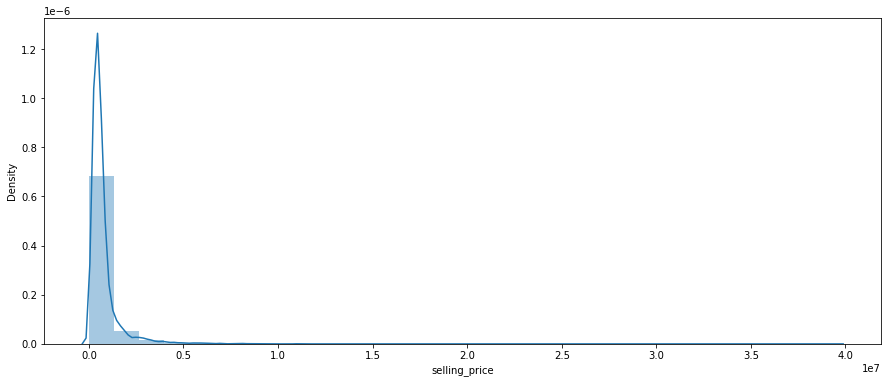

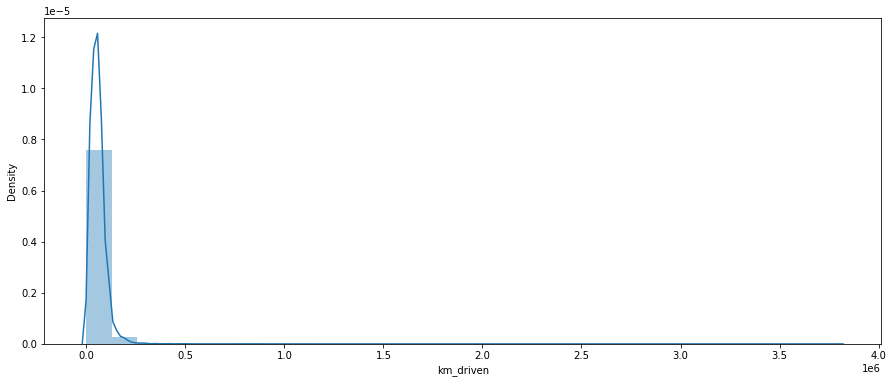

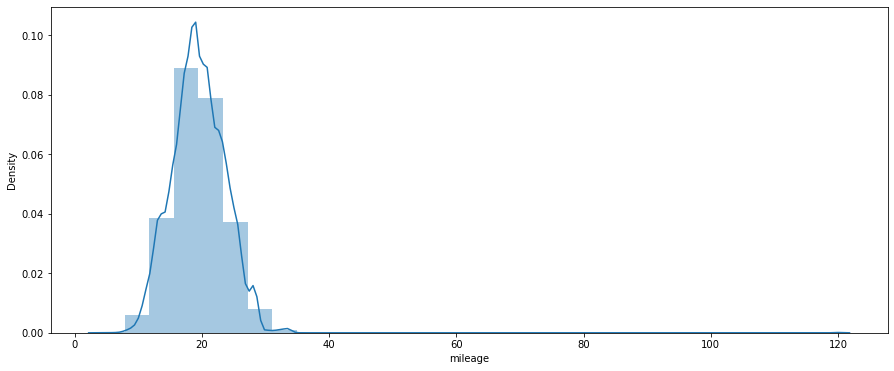

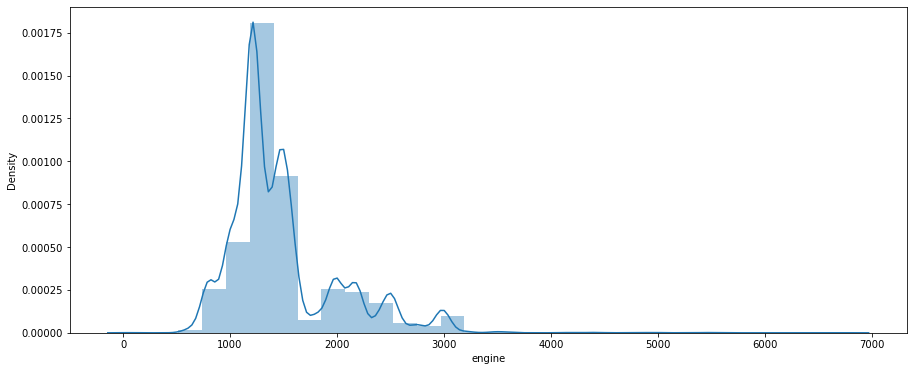

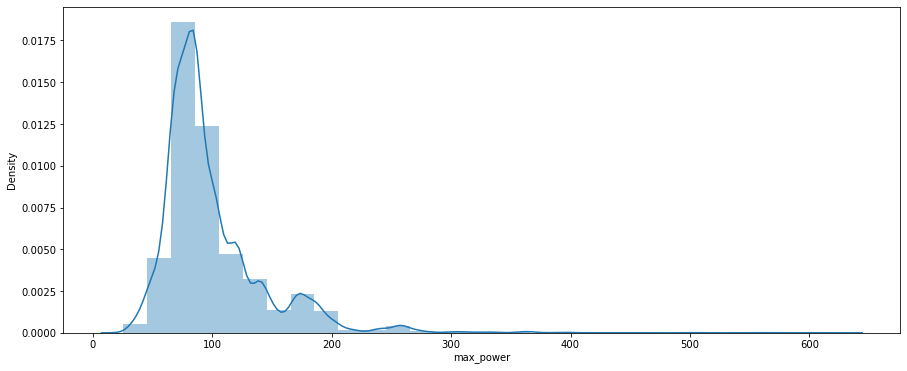

In [11]:
for i in cont:
    plt.figure(figsize=(15,6))
    sns.distplot(data[i],bins=30)

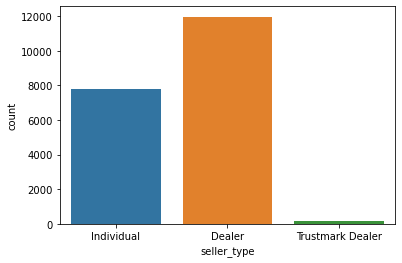

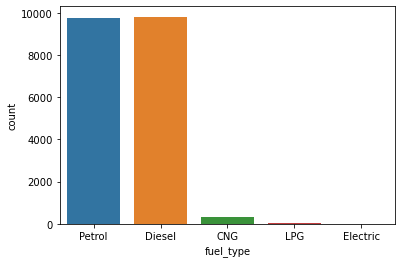

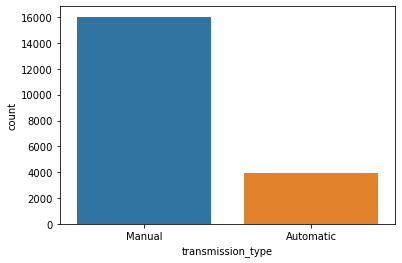

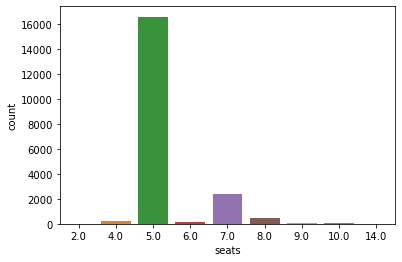

In [12]:
for i in cate:
    plt.figure(figsize=(6,4))
    sns.countplot(data[i])

[Text(0.5, 1.0, 'Top10 Companies in the dataset')]

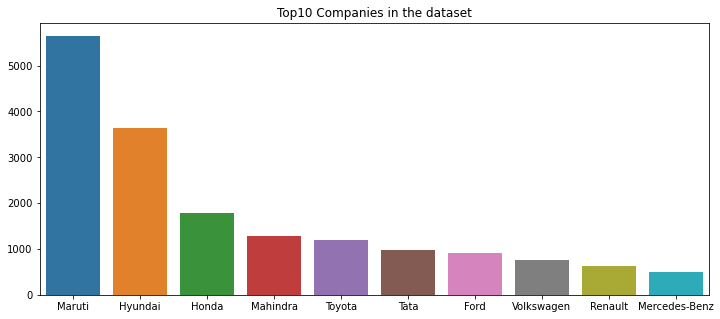

In [13]:
# Top10 Companies in the dataset

cars = data.company.value_counts().head(10)
plt.figure(figsize=(12,5))
sns.barplot(x=cars.index, y=cars.values).set(title='Top10 Companies in the dataset')

[Text(0.5, 1.0, 'Top10 Least used Car Companies in the dataset')]

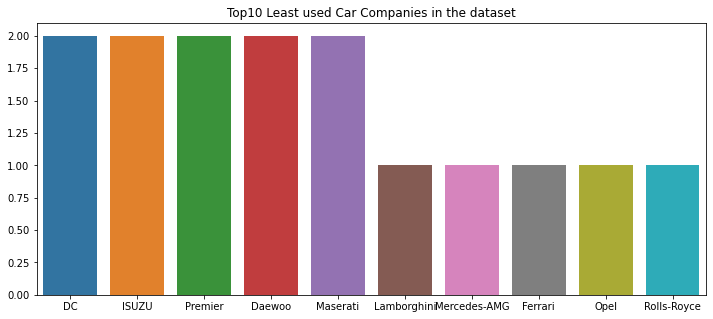

In [14]:
# Top10 Least used Car Companies in the dataset

cars = data.company.value_counts().tail(10)
plt.figure(figsize=(12,5))
sns.barplot(x=cars.index, y=cars.values).set(title='Top10 Least used Car Companies in the dataset')

### Bivariate Analysis

[Text(0.5, 1.0, 'Top10 Car Company with highest selling price')]

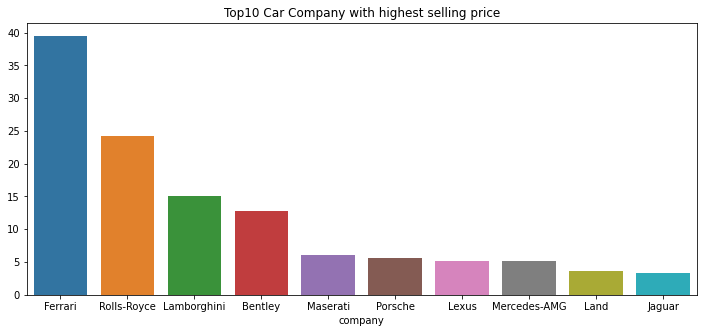

In [15]:
# Top10 Car Company with highest selling price

cars = data.groupby('company')['selling_price'].mean().sort_values(ascending=False).head(10)/1000000
plt.figure(figsize=(12,5))
sns.barplot(x=cars.index, y=cars.values).set(title='Top10 Car Company with highest selling price')

[Text(0.5, 1.0, 'Top 10 car company with highest mileage')]

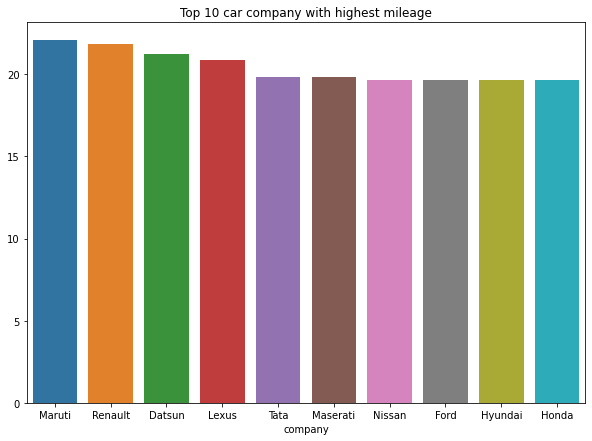

In [16]:
# Top 10 car company with highest mileage

cars = data.groupby('company')['mileage'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,7))
sns.barplot(x=cars.index, y=cars.values).set(title='Top 10 car company with highest mileage')

[Text(0.5, 1.0, 'Top 10 car company with highest engine cc')]

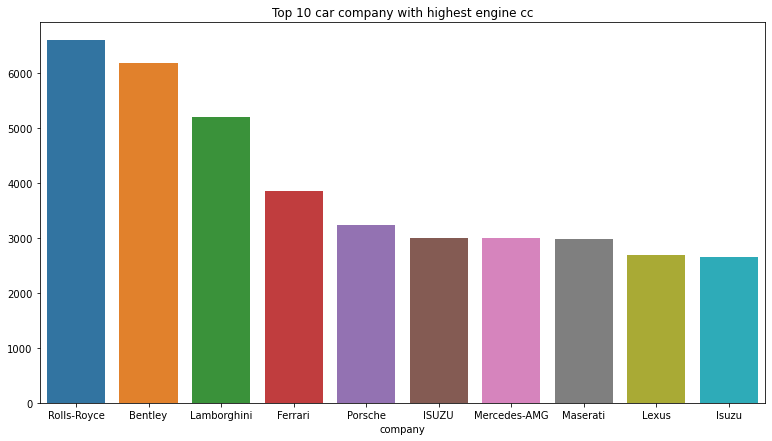

In [17]:
# Top 10 car company with highest engine cc

cars = data.groupby('company')['engine'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(13,7))
sns.barplot(x=cars.index, y=cars.values).set(title='Top 10 car company with highest engine cc')

[Text(0.5, 1.0, 'Top 10 car company with highest max_power')]

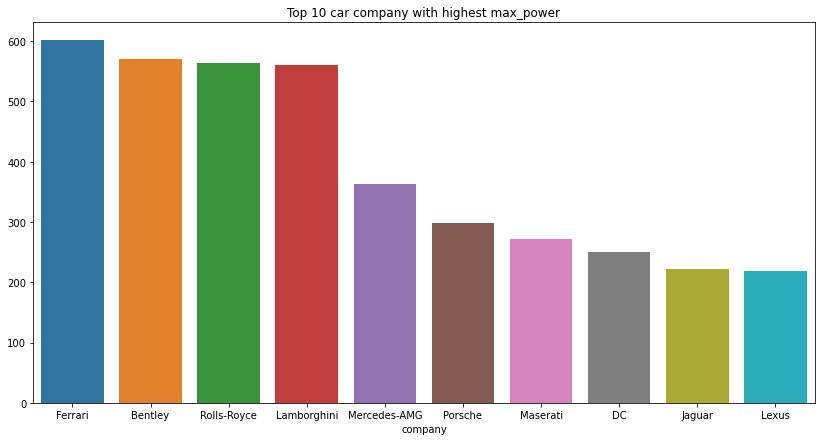

In [18]:
# Top 10 car company with highest max_power

cars = data.groupby('company')['max_power'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(14,7))
sns.barplot(x=cars.index, y=cars.values).set(title='Top 10 car company with highest max_power')

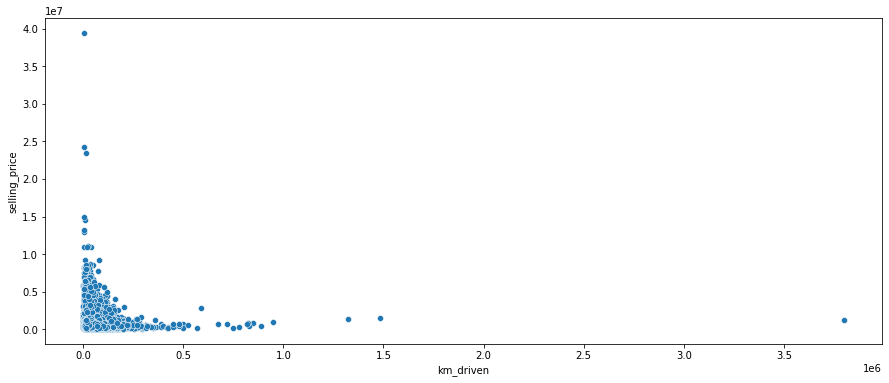

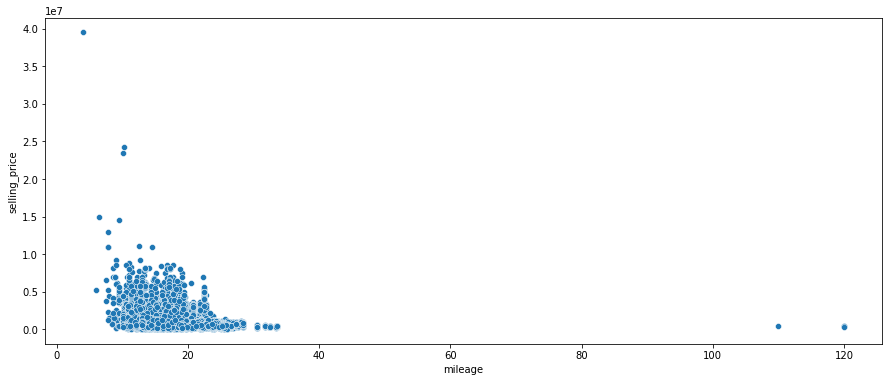

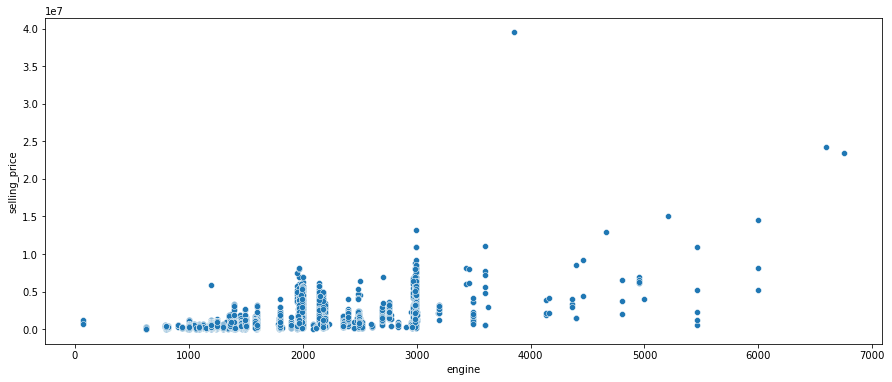

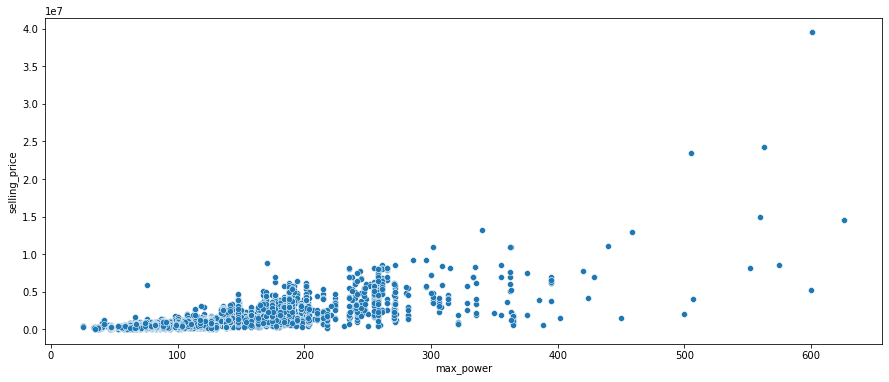

In [19]:
for i in ['km_driven','mileage','engine','max_power']:
    plt.figure(figsize=(15,6))
    sns.scatterplot(x=data[i],y=data['selling_price'])

### If kilometres driven is more, then the selling price of the car will be less.
### There is no significant relation between mileage and selling price of the car. In some cases, higher the mileage lower is the selling price.
### If the engine's cc is more, then the selling price of the car is also more.
### If the power of the engine is more, then the selling price of the car is also more.

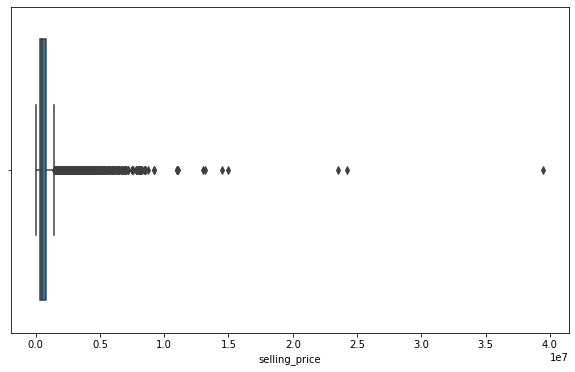

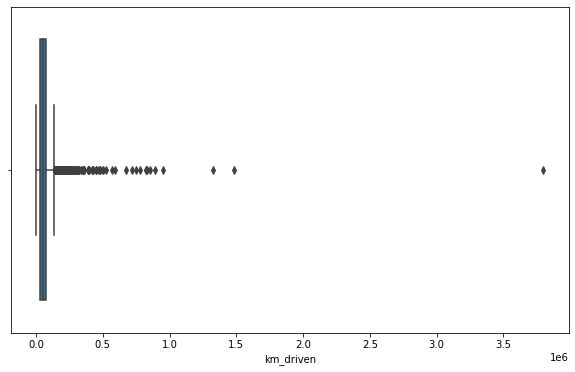

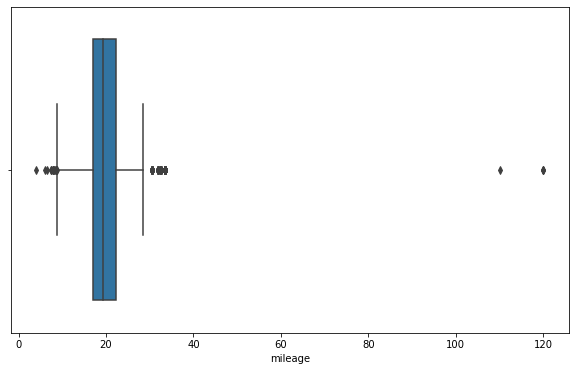

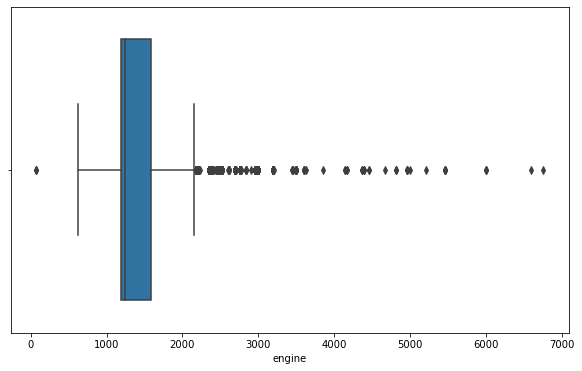

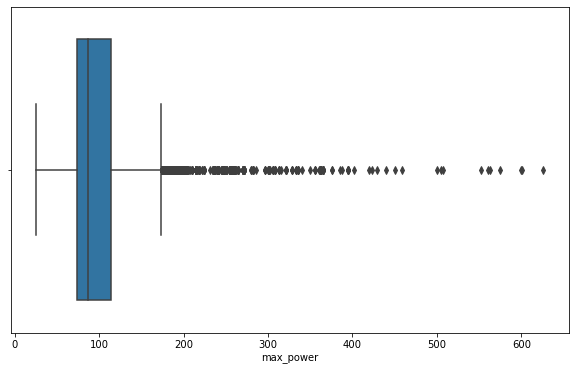

In [20]:
# Checking Outliers

for i in cont:
    plt.figure(figsize=(10,6))
    sns.boxplot(data[i])

<AxesSubplot:>

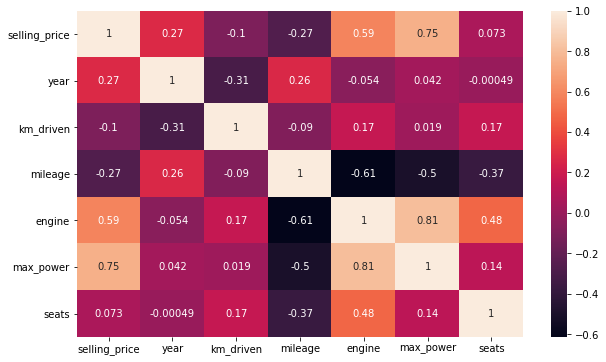

In [21]:
cor=data.corr()
plt.figure(figsize=(10,6))
sns.heatmap(cor,annot=True)

### Handling Missing Values

In [22]:
for i in ['mileage', 'engine', 'max_power', 'seats']:
    company_name = data[data[i].isnull()]['company'].value_counts().index[0]
    if data[i].nunique()>10:
        values = data[data['company']==company_name][i].mean()
    else:
        values = data[data['company']==company_name][i].median()
        
    data[i].fillna(values, inplace=True)

### Removing Outliers

In [23]:
data.shape

(19974, 11)

In [24]:
data = data[data['selling_price'] < 20000000]
data = data[data['km_driven'] < 1000000]
data = data[data['mileage'] < 100]
data = data[data['engine'] < 6100]
data = data[data['max_power'] < 530]
data = data.reset_index(drop=True)

In [25]:
data.shape

(19959, 11)

### Reducing the total number of companies.

In [26]:
company_name = data.company.value_counts().index[:15]
for i in range(data.shape[0]):
    if data['company'][i] in company_name:
         continue
    else:
        data['company'][i] = 'others'

### Encoding

In [28]:
data = pd.get_dummies(data=data, columns=['seller_type','fuel_type','transmission_type','company'], drop_first=True)
data.shape

(19959, 29)

In [29]:
x = data.iloc[:,1:]
y = data['selling_price']

### Scaling

In [31]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x.head()

,year,km_driven,mileage,engine,max_power,seats,seller_type_Individual,seller_type_Trustmark Dealer,fuel_type_Diesel,fuel_type_Electric,...,company_Mahindra,company_Maruti,company_Mercedes-Benz,company_Nissan,company_Renault,company_Skoda,company_Tata,company_Toyota,company_Volkswagen,company_others
0,-0.777488,1.465769,0.051800,-1.324634,-1.236998,-0.381657,1.246963,-0.098036,-0.983453,-0.022389,...,-0.26243,1.591797,-0.160297,-0.121212,-0.181423,-0.146792,-0.226625,-0.253482,-0.199233,-0.189516
1,0.453553,-0.895973,-0.146050,-0.541509,-0.396538,-0.381657,1.246963,-0.098036,-0.983453,-0.022389,...,-0.26243,-0.628221,-0.160297,-0.121212,-0.181423,-0.146792,-0.226625,-0.253482,-0.199233,-0.189516
2,-1.393008,0.048724,-0.615943,-0.541509,-0.443622,-0.381657,1.246963,-0.098036,-0.983453,-0.022389,...,-0.26243,-0.628221,-0.160297,-0.121212,-0.181423,-0.146792,-0.226625,-0.253482,-0.199233,-0.189516
3,-0.777488,-0.494477,0.353520,-0.930142,-0.747318,-0.381657,1.246963,-0.098036,-0.983453,-0.022389,...,-0.26243,1.591797,-0.160297,-0.121212,-0.181423,-0.146792,-0.226625,-0.253482,-0.199233,-0.189516
4,0.145792,-0.659799,0.811048,0.046323,-0.005971,-0.381657,-0.801949,-0.098036,1.016826,-0.022389,...,-0.26243,-0.628221,-0.160297,-0.121212,-0.181423,-0.146792,-0.226625,-0.253482,-0.199233,-0.189516


### Choosing Random Variable

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
maxr2=0
maxran=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    r2=r2_score(y_test,pred)
    if r2>maxr2:
        maxr2=r2
        maxran=i
print('max r2=',maxr2,'ran state=',maxran)

max r2= 0.7459941701569187 ran state= 76


In [34]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=maxran)

### Model Selection with Hyper Parameter Tuning

In [37]:
# Lasso Regression

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

parameters={'alpha':[.0001, .001, .01, .1, 1,10],'random_state':list(range(0,10)),'fit_intercept':[True,False],'selection':['cyclic', 'random']}
ls = Lasso()
clf = GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'alpha': 10, 'fit_intercept': True, 'random_state': 4, 'selection': 'random'}


In [38]:
ls = Lasso(alpha=10,fit_intercept=True,random_state=4,selection='random')
ls.fit(x_train,y_train)
pred=ls.predict(x_test)
r2=r2_score(y_test,pred)
a1=r2*100
a1

74.59989505423069

In [39]:
from sklearn.metrics import mean_squared_error
print('RMSE:', np.sqrt(mean_squared_error(y_test, pred)))

RMSE: 385105.5487501675


In [40]:
# Ridge Regression

from sklearn.linear_model import Ridge

parameters = {'alpha':[.0001, .001, .01, .1, 1],'max_iter':list(range(1,11)),'normalize':[True,False],'copy_X':[True,False]}
rd = Ridge()
clf = GridSearchCV(rd,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'alpha': 0.0001, 'copy_X': True, 'max_iter': 1, 'normalize': True}


In [41]:
rd = Ridge(alpha=0.0001,copy_X=True,max_iter=1,normalize=True)
rd.fit(x_train,y_train)
pred=rd.predict(x_test)
r2=r2_score(y_test,pred)
a2=r2*100
a2

74.60028614171944

In [42]:
print('RMSE:', np.sqrt(mean_squared_error(y_test, pred)))

RMSE: 385102.5839879741


In [43]:
# Linear Regression

parameters = {'fit_intercept':[True,False], 'copy_X':[True,False],'normalize':[True,False],'n_jobs':list(range(1,11))}
lr=LinearRegression()
clf = GridSearchCV(lr,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'copy_X': True, 'fit_intercept': True, 'n_jobs': 1, 'normalize': False}


In [44]:
lr=LinearRegression(copy_X=True,fit_intercept=True,n_jobs=1,normalize=False)
lr.fit(x_train,y_train)
pred=lr.predict(x_test)
r2=r2_score(y_test,pred)
a3=r2*100
a3

74.59941701569187

In [45]:
print('RMSE:', np.sqrt(mean_squared_error(y_test, pred)))

RMSE: 385109.1726412505


In [46]:
# Decision Tree Regressor

from sklearn.tree import DecisionTreeRegressor
parameters={'criterion':['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],'splitter':['best', 'random'],'max_depth':list(range(1,15)),
            'max_features':['auto', 'sqrt', 'log2']}
dtr=DecisionTreeRegressor()
clf = GridSearchCV(dtr,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'criterion': 'friedman_mse', 'max_depth': 12, 'max_features': 'auto', 'splitter': 'random'}


In [47]:
dtr = DecisionTreeRegressor(criterion='friedman_mse',max_depth=12,max_features='auto',splitter='random')
dtr.fit(x_train,y_train)
pred=dtr.predict(x_test)
r2=r2_score(y_test,pred)
a4=r2*100
a4

86.49945791358661

In [48]:
print('RMSE:', np.sqrt(mean_squared_error(y_test, pred)))

RMSE: 280761.54535629746


### Cross Validation

In [49]:
from sklearn.model_selection import cross_val_score
cv1=(cross_val_score(ls,x,y,cv=5).mean())*100
cv2=(cross_val_score(rd,x,y,cv=5).mean())*100
cv3=(cross_val_score(lr,x,y,cv=5).mean())*100
cv4=(cross_val_score(dtr,x,y,cv=5).mean())*100
print(cv1,cv2,cv3,cv4)

69.59066424657752 69.59069777933935 69.59019760291145 85.78512131061814


In [50]:
print((a1-cv1),(a2-cv2),(a3-cv3),(a4-cv4))

5.009230807653168 5.009588362380086 5.009219412780425 0.7143366029684728


### We can choose Descision Tree Regressor as our model, since its r2 score and cv_score has least difference.

In [51]:
fin_price = DecisionTreeRegressor(criterion='friedman_mse',max_depth=12,max_features='auto',splitter='random')
fin_price.fit(x_train,y_train)
pred=fin_price.predict(x_test)
r2=r2_score(y_test,pred)
fin_r2=r2*100
fin_r2

88.34134901456548

## Saving the Model

In [52]:
import joblib
joblib.dump(fin_price,'Final_price.pkl')

['Final_price.pkl']